<a href="https://colab.research.google.com/github/bardiaHSZD/ComputerVisionVFX/blob/main/Computer_Vision_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Applications**

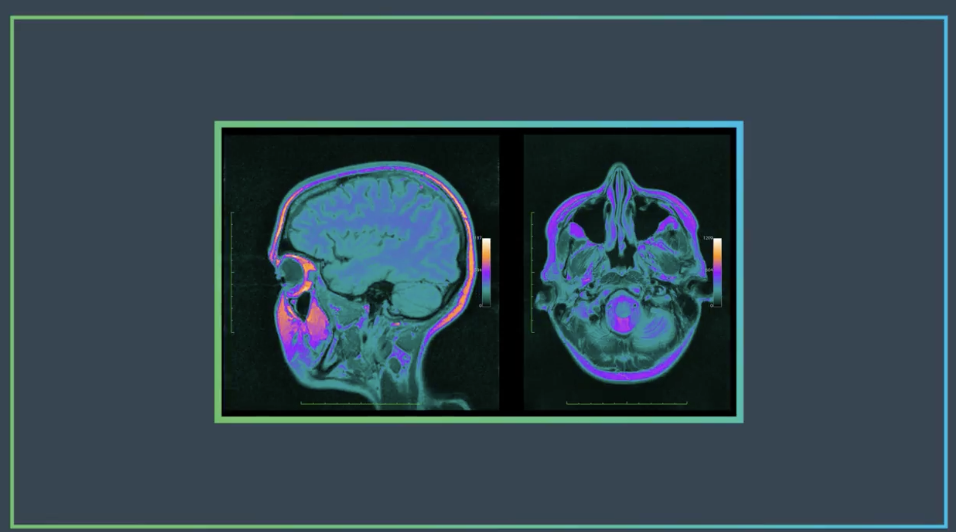

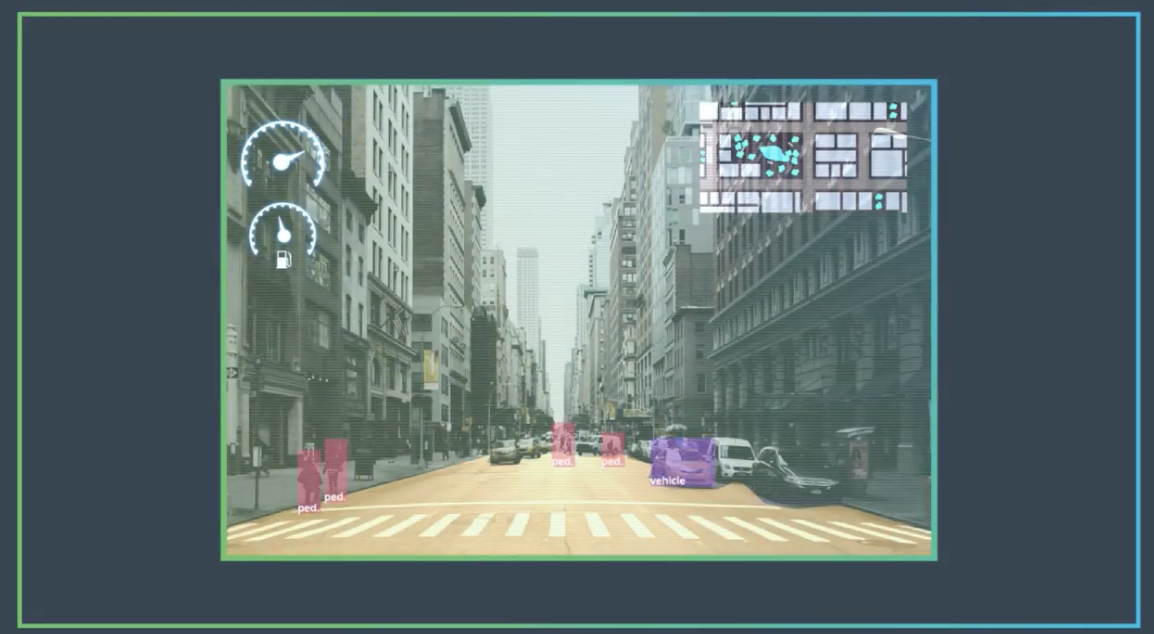

**Overview**

* **Intro to Computer Vision**, which covers topics like image processing, feature extraction done manually or through training a convolutional neural network (CNN) using PyTorch.
* **Advanced Computer Vision and Deep Learning,** which is all about advances in deep learning architectures like region-based CNN's, YOLO and single-shot detection algorithms, and CNN's used in combination with recurrent neural networks.
* **Object Tracking and Localization,** which covers how a robot can move and sense the world around it, creating a visual representation of the world as it navigates.
Each of these three sections will have an associated project that allows you to demonstrate the skills you've learned in each part.

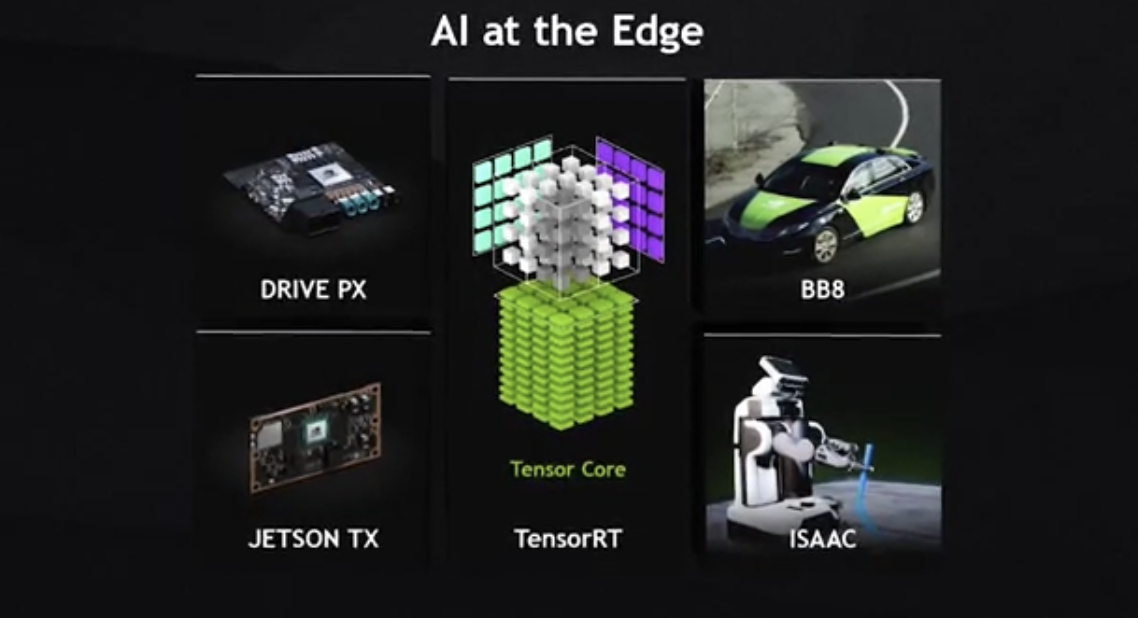

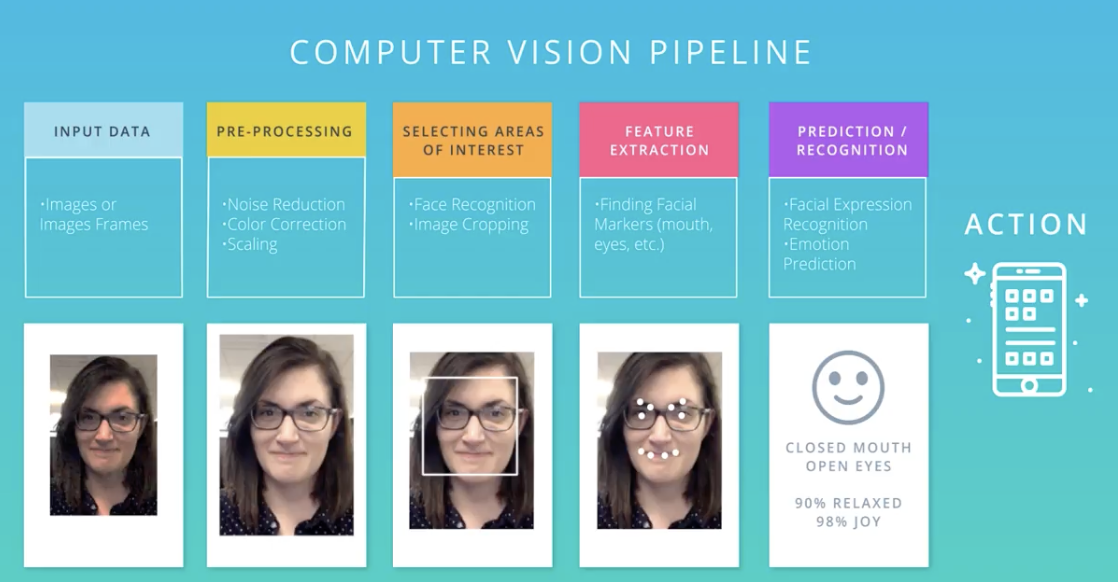

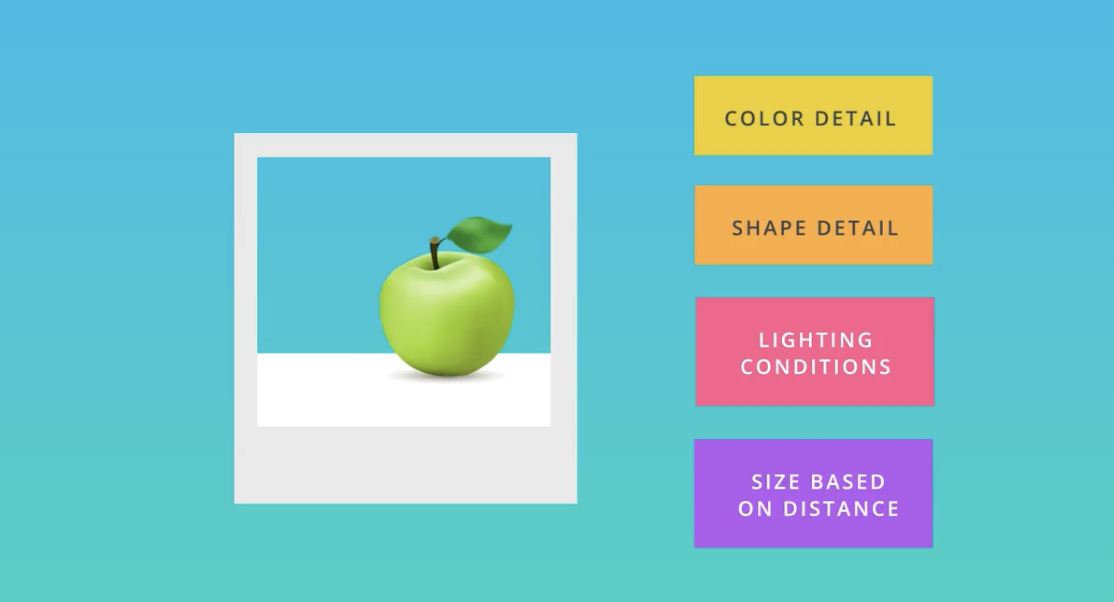

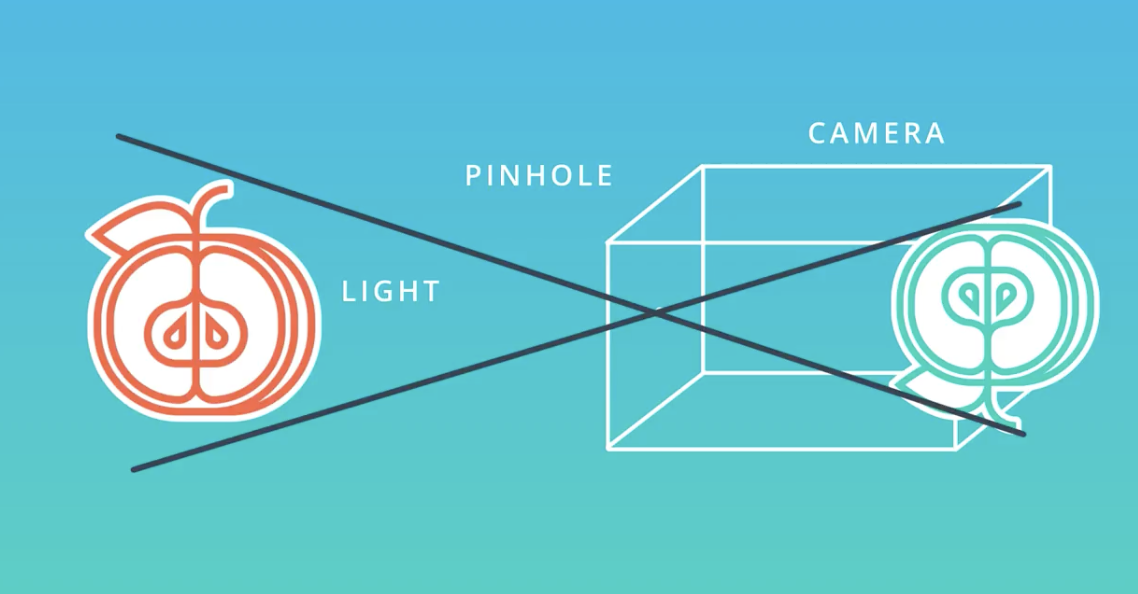

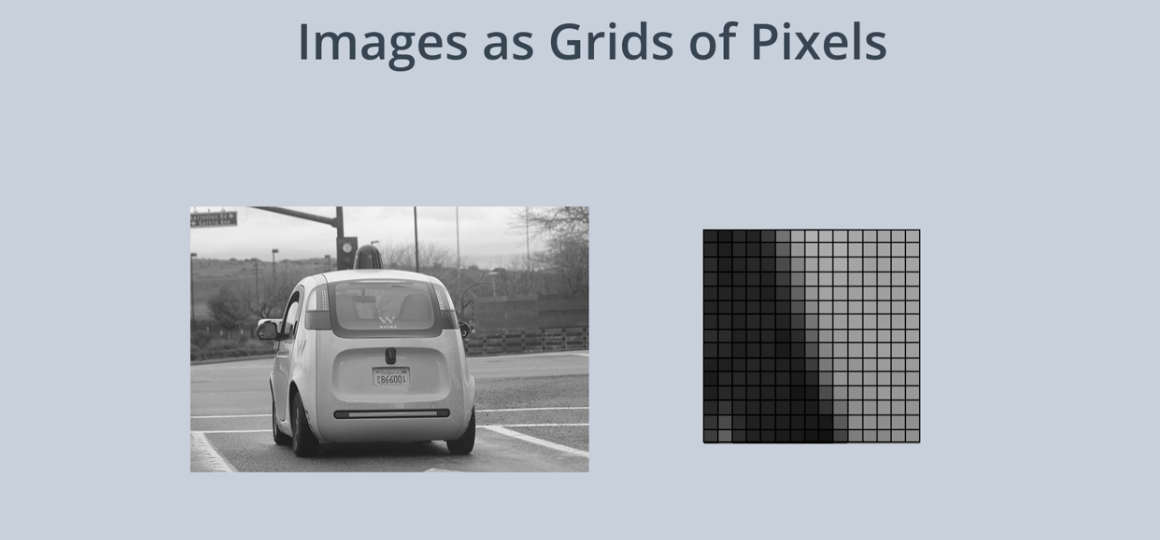

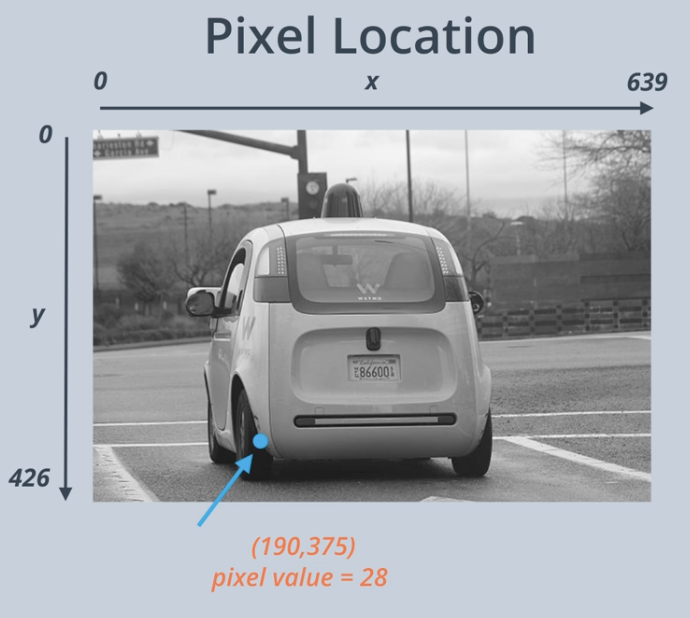

## **Example I**: Images as grids of pixels



### **Import resources**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg # for reading in images
import matplotlib.pyplot as plt
import cv2 # computer vision library

import gc
gc.enable()
plt.rcParams['figure.figsize'] = [15, 10]
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read in and display the image**

Image dimensions:  (832, 555, 3)


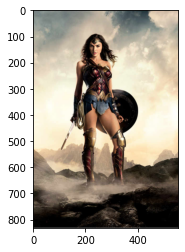

In [23]:
import urllib.request
imgURL = "https://image.posterlounge.com/images/l/1898956.jpg"
urllib.request.urlretrieve(imgURL, "/content/local-filename.jpg")


image = mpimg.imread("/content/local-filename.jpg")
print('Image dimensions: ', image.shape)
imgplot = plt.imshow(image)
plt.show()

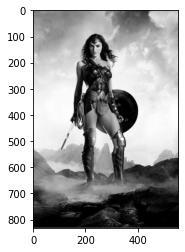

In [31]:
# convert from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [33]:
# print a specific grayscale pixel value
x = 190
y = 375
pixel_val = gray_image[y, x]
print(pixel_val)

175


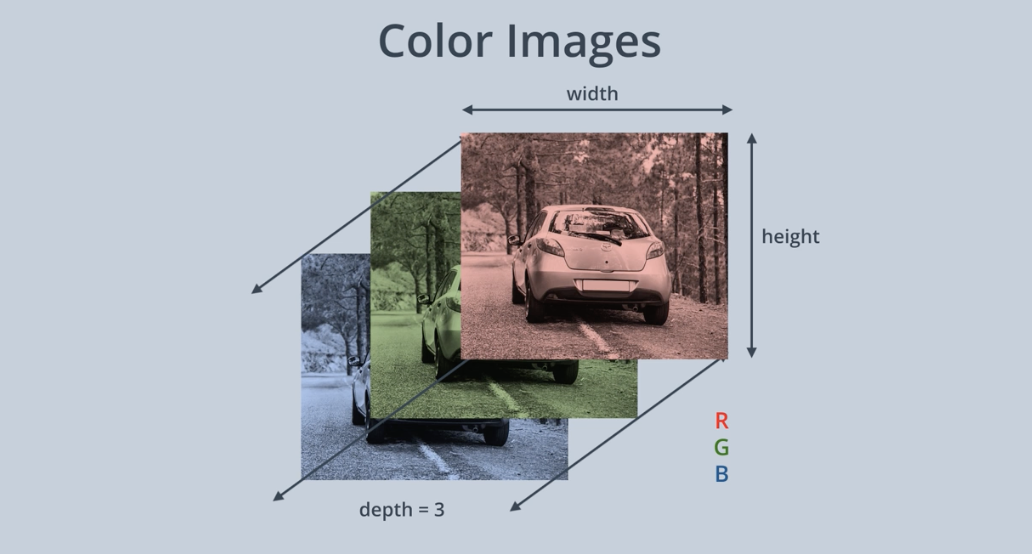

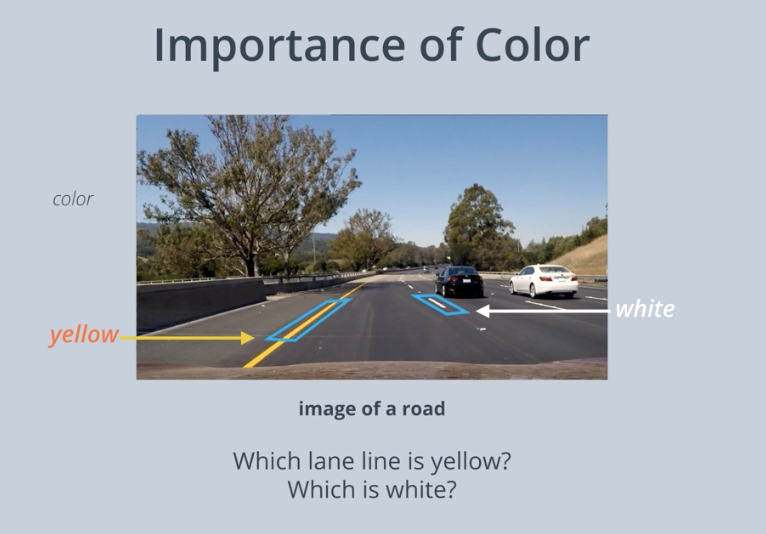

## **Example II: Coding a Blue Screen**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # computer vision library

import gc
gc.enable()
plt.rcParams['figure.figsize'] = [15, 10]
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The image is <class 'numpy.ndarray'>  with dimensions:  (724, 1280, 3)


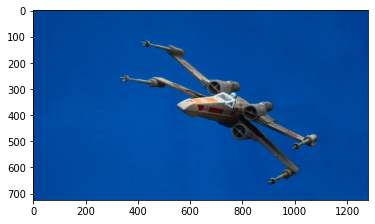

In [4]:
import urllib.request
imgURL = "http://www.cgmeetup.net/home/wp-content/uploads/2016/07/Blue-Screen-Chroma-Key-1.jpg"
urllib.request.urlretrieve(imgURL, "/content/local-filename.jpg")


image = cv2.imread("/content/local-filename.jpg")
print('The image is', type(image),
      ' with dimensions: ', image.shape)

# OpenCV reads the image as BGR
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

% matplotlib inline
# Display the image
plt.imshow(image_copy)

### **Define the color threshold**

In [47]:
lower_blue = np.array([0, 0 , 130])
upper_blue = np.array([90, 90 , 255])

### **Create Mask**

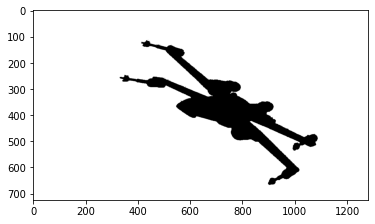

In [48]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

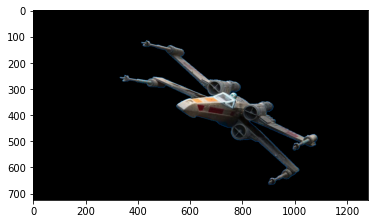

In [50]:
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

The image is <class 'numpy.ndarray'>  with dimensions:  (2396, 4509, 3)


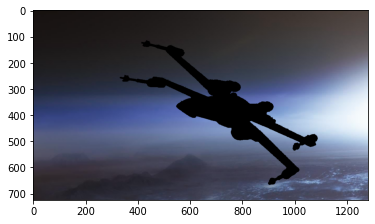

In [67]:
# background image:
import urllib.request
imgURL = "https://i.pinimg.com/originals/91/50/7b/91507b7a09f2f83d47484b726f3392d0.jpg"
urllib.request.urlretrieve(imgURL, "/content/local-filename-background.jpg")
background_image = cv2.imread("/content/local-filename-background.jpg")
print('The image is', type(background_image),
      ' with dimensions: ', background_image.shape)
# Crop the background image
cropped_background = background_image[0:724, 0:1280]

# Mask the cropped background 
cropped_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(cropped_background)

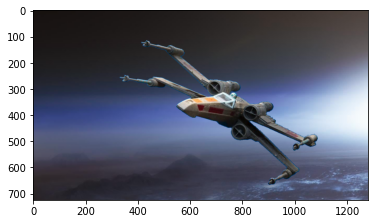

In [69]:
complete_image = cropped_background + masked_image
# Display the complete image
plt.imshow(complete_image)

## **Example III: Color Space and Transformations**

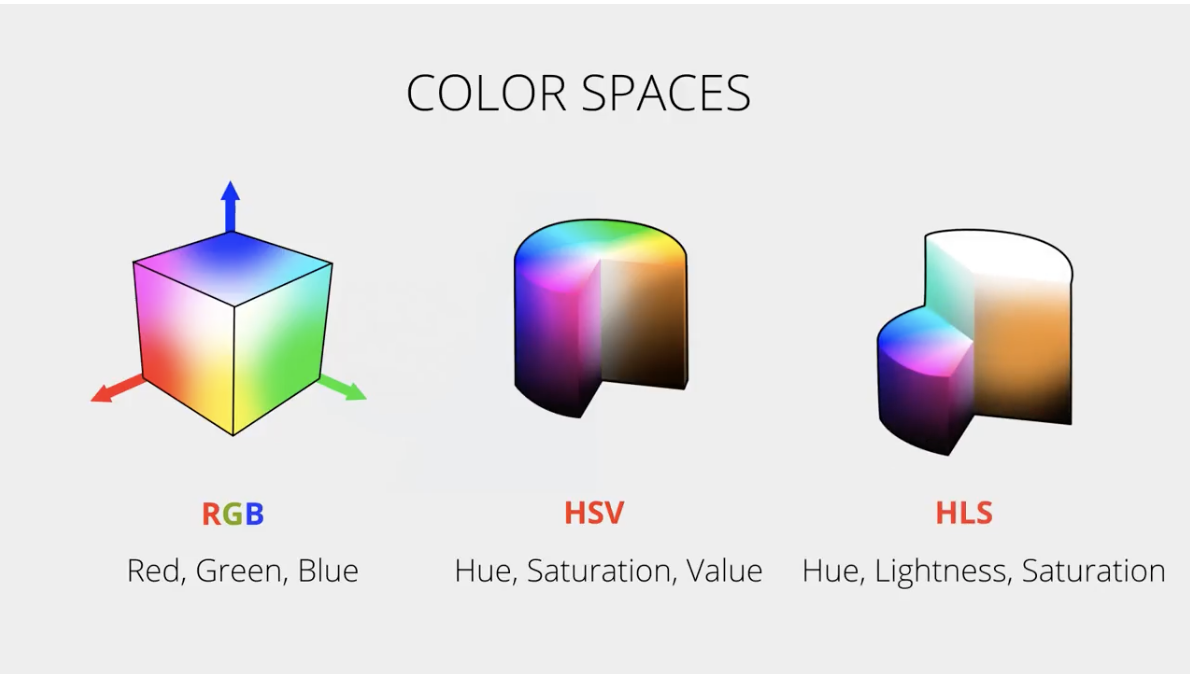

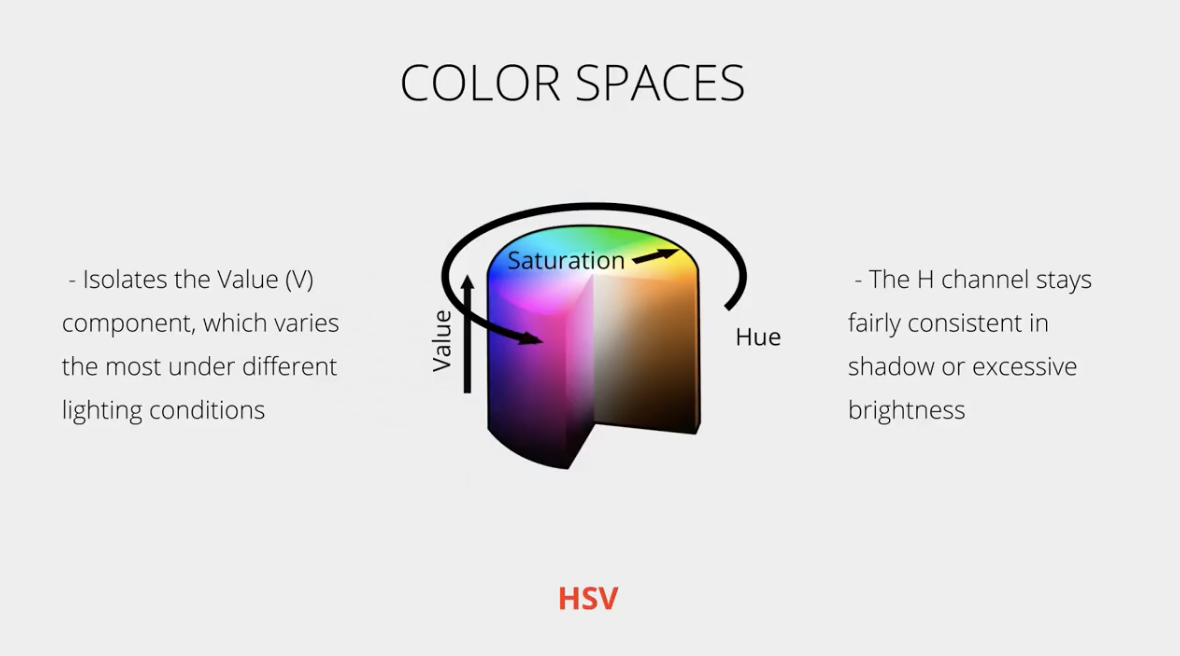

The image is <class 'numpy.ndarray'>  with dimensions:  (331, 800, 3)


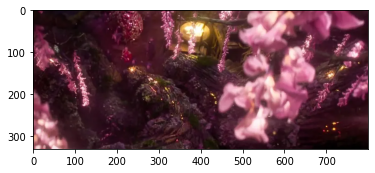

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

% matplotlib inline

# Read in the image
import urllib.request
imgURL = "https://ziggyknowsdisney.com/wp-content/uploads/2019/10/jungle-cruise-trailer-3.jpg.webp"
urllib.request.urlretrieve(imgURL, "/content/local-filename.jpg")
image = cv2.imread("/content/local-filename.jpg")
print('The image is', type(image),
      ' with dimensions: ', image.shape)


# Make a copy of the image
image_copy = np.copy(image)

# Change the color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)



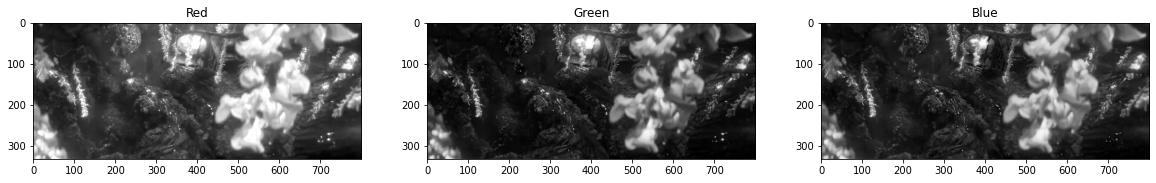

In [19]:
# RGB channels
r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

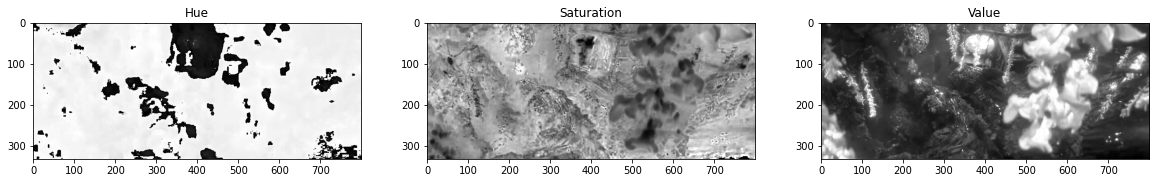

In [20]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

#### **Define pink and hue selection thresholds**

In [65]:
# Define our color selection criteria in RGB values
lower_pink = np.array([90,0,100]) 
upper_pink = np.array([255,255,230])

# Define our color selection criteria in HSV values
lower_hue = np.array([130,0,0]) 
upper_hue = np.array([180,255,255])

#### **Mask the image**

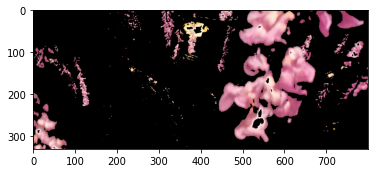

In [62]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

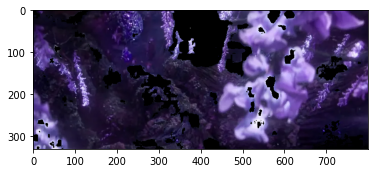

In [66]:
# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

## **Example IV: Green Screen HSV**

### **Preparing the image and the color channels**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

# Read in the image
import urllib.request
imgURL = "https://ziggyknowsdisney.com/wp-content/uploads/2019/10/jungle-cruise-trailer-3.jpg.webp"
urllib.request.urlretrieve(imgURL, "/content/local-filename.jpg")
image = cv2.imread("/content/local-filename.jpg")
print('The image is', type(image),
      ' with dimensions: ', image.shape)

In [ ]:
# Visualize the green threshold you defined in the previous, 
# consistent green color case.

# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

In [ ]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

#### **Make the green area using HSV color space**

In [ ]:
# Define our color selection boundaries in HSV values

## TODO: Change these thresholds
# This initial threshold allows a certain low range for Hue (H)
lower_hue = np.array([0,0,0]) 
upper_hue = np.array([50,255,255])

# Define the masked area
mask = cv2.inRange(image, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)